In [46]:
import pathlib
import sys
import matplotlib.pyplot as plt

# Define code path and add to sys.path
code_path = "/Users/heathermcbrien/Documents/Documents/GitHub.nosync/casey_lab_shared_functions/wf_disaster_exp_by_geo/code"
sys.path.append(str(code_path))

# Import local modules
from num_people_affected_helpers import *

In [47]:
la_wf_path = '/Volumes/squirrel-utopia 3/los_angeles_2025_fire_disasters_exp/los_angeles_2025_fire_disasters_exp/data/02_processed/cleaned_LA_wfs_to_2025_01_21.parquet'
ghs_pop_path = "/Volumes/squirrel-utopia 3/GHSL/100 m/GHS_POP_E2020_GLOBE_R2023A_54009_100_V1_0/GHS_POP_E2020_GLOBE_R2023A_54009_100_V1_0.tif"

In [48]:
# prep data
la_dat = prep_data(
    path_to_hazards = la_wf_path,
    buffer_dist_large = 500,
    buffer_dist_small = 500,
    area_thresh_for_large_buffer = 0)

/Users/heathermcbrien/Documents/Documents/GitHub.nosync/casey_lab_shared_functions/wf_disaster_exp_by_geo/code/num_people_affected_helpers.py:37: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ch_shp["centroid_lon"] = ch_shp.centroid.x
/Users/heathermcbrien/Documents/Documents/GitHub.nosync/casey_lab_shared_functions/wf_disaster_exp_by_geo/code/num_people_affected_helpers.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ch_shp["centroid_lat"] = ch_shp.centroid.y


Reading data and finding best UTM projection for hazard geometries (1/6)


Buffering hazard geometries (3/6): 100%|██████████| 7/7 [00:00<00:00, 42.44it/s]


<Axes: >

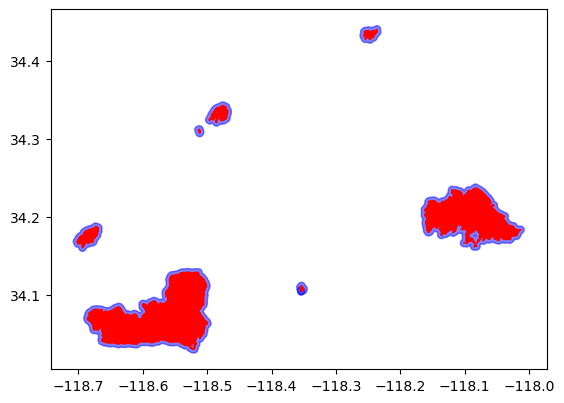

In [49]:
# plot buffered geoms with geometry on top 
fig, ax = plt.subplots()

# Temporarily set 'buffered_hazard' as the active geometry column and plot it
la_dat.set_geometry('buffered_hazard').plot(ax=ax, color='blue', alpha=0.5, edgecolor='blue')

# Overlay the original geometries
la_dat.set_geometry('geometry').plot(ax=ax, color='red', edgecolor='red')

archer


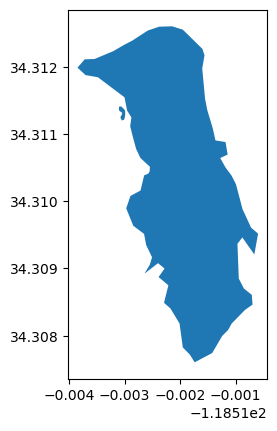

eaton


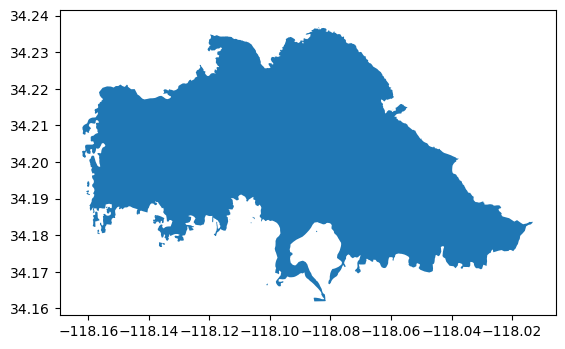

hurst


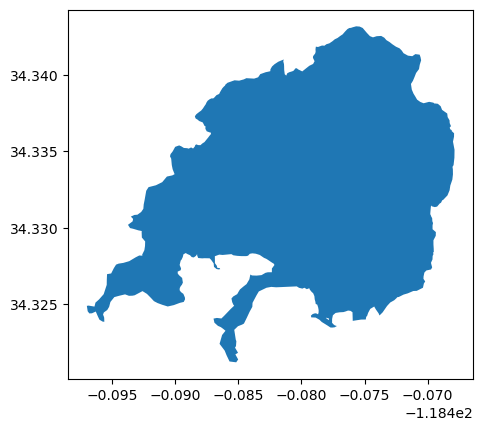

kenneth


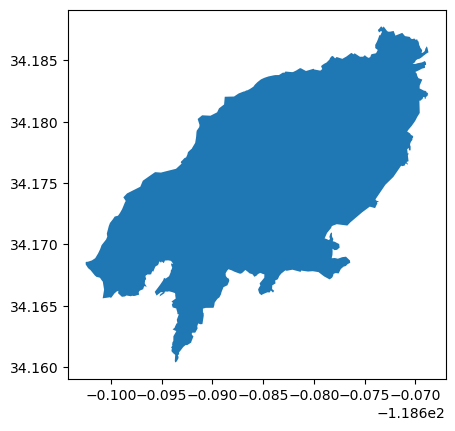

lidia


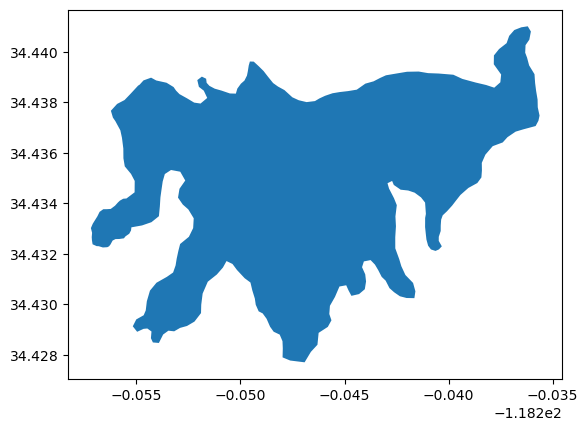

palisades


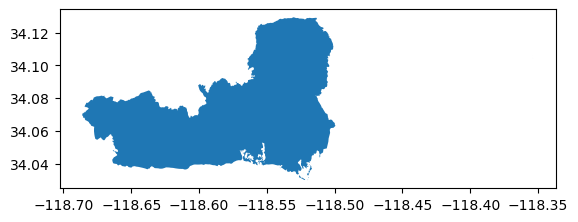

sunset


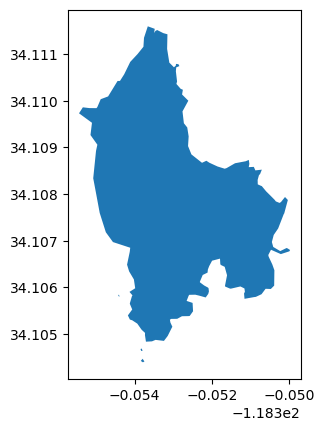

In [50]:
# plot
for name in la_dat["ID_climate_hazard"].unique():
    print(name)
    la_dat[la_dat["ID_climate_hazard"] == name].plot()
    plt.show()

In [38]:
la_dat = la_dat[["ID_climate_hazard", "buffered_hazard"]]
    # rename buffered hazard to geometry
la_dat = la_dat.rename(columns={"buffered_hazard": "geometry"})
la_dat = la_dat.set_geometry("geometry")

# do overlapping geoms
la_dat = la_dat.explode()

    # call

all_one_geometry = unary_union(la_dat["geometry"])
print(all_one_geometry)



MULTIPOLYGON (((-118.69157409699645 34.07046914412947, -118.69153473573691 34.070875695976795, -118.69145137926517 34.07127762324337, -118.69141160540653 34.07142835463138, -118.69127727313304 34.07184234120424, -118.69109627950809 34.07224383332177, -118.69087026161347 34.07262919804468, -118.69060126401529 34.07299494831387, -118.69029172028146 34.073337774510065, -118.68994443097567 34.073654574408955, -118.68965719999142 34.07387111661811, -118.68971434563952 34.07406405666583, -118.68979124994364 34.0745196408654, -118.68981195511341 34.07497937499043, -118.68977624460537 34.07543847112407, -118.68968448942418 34.07589214791754, -118.68953764429651 34.07633568038712, -118.68951420222392 34.07639456721994, -118.68950017441074 34.076430178752716, -118.68933149834798 34.07680211039355, -118.68912409963951 34.07716023040019, -118.68909303213256 34.07720362481086, -118.68905963009769 34.07728083844456, -118.68880711467524 34.07771334423669, -118.6887701933915 34.07776246120664, -118.68

In [39]:
 non_overlapping_hazards = gpd.GeoDataFrame(
        {"geometry": [all_one_geometry]}, crs=la_dat.crs
    ).explode()

In [40]:
print(non_overlapping_hazards)

                                            geometry
0  POLYGON ((-118.69157 34.07047, -118.69153 34.0...
0  POLYGON ((-118.68525 34.16134, -118.68579 34.1...
0  POLYGON ((-118.50527 34.31042, -118.5052 34.30...
0  POLYGON ((-118.34993 34.10121, -118.34994 34.1...
0  POLYGON ((-118.39867 34.13892, -118.39863 34.1...
0  POLYGON ((-118.1675 34.20292, -118.1675 34.202...
0  POLYGON ((-118.49982 34.32961, -118.49949 34.3...
0  POLYGON ((-118.26249 34.43401, -118.26236 34.4...


In [41]:
 joined = gpd.sjoin(
        non_overlapping_hazards, la_dat, how="left", predicate="intersects"
    )

In [42]:
print(joined)

                                            geometry  index_right  \
0  POLYGON ((-118.69157 34.07047, -118.69153 34.0...            3   
0  POLYGON ((-118.69157 34.07047, -118.69153 34.0...            3   
0  POLYGON ((-118.69157 34.07047, -118.69153 34.0...            3   
0  POLYGON ((-118.69157 34.07047, -118.69153 34.0...            5   
0  POLYGON ((-118.68525 34.16134, -118.68579 34.1...            3   
0  POLYGON ((-118.50527 34.31042, -118.5052 34.30...            0   
0  POLYGON ((-118.34993 34.10121, -118.34994 34.1...            5   
0  POLYGON ((-118.34993 34.10121, -118.34994 34.1...            6   
0  POLYGON ((-118.39867 34.13892, -118.39863 34.1...            3   
0  POLYGON ((-118.1675 34.20292, -118.1675 34.202...            1   
0  POLYGON ((-118.49982 34.32961, -118.49949 34.3...            2   
0  POLYGON ((-118.26249 34.43401, -118.26236 34.4...            4   

  ID_climate_hazard  
0           kenneth  
0           kenneth  
0           kenneth  
0         pali

In [44]:
joined["geometry_wkt"] = joined["geometry"].apply(lambda geom: geom.wkt)
without_geom = joined.drop(columns="geometry")
without_geom = (
        without_geom.groupby("geometry_wkt")
        .agg({'ID_climate_hazard': lambda x: "___".join(x)})
        .reset_index()
    )

In [ ]:
print(without_geom)

In [ ]:
la_dat= combine_overlapping_geometries(la_dat, id_column="ID_climate_hazard")

<Axes: >

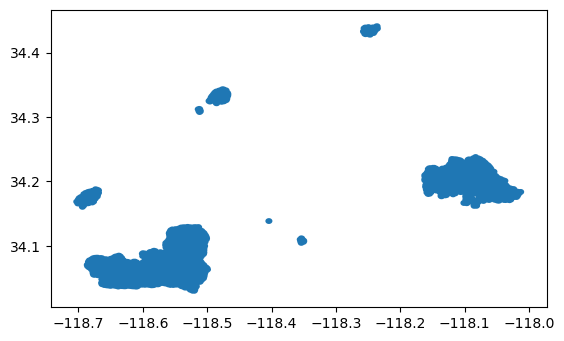

In [7]:
la_dat.plot()
print(la_dat)